 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [314]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [261]:
whale_path = Path('./Resources/whale_returns.csv')  #Reading whale returns
whale_csv = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)  
#Call whale df and convert dates to DateTimeIndex

algo_path = Path('./Resources/algo_returns.csv')  #Reading algorithmic returns
algo_csv = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)  
#Call algo df and convert dates to DateTimeIndex

sp500_path = Path('./Resources/sp500_history.csv')
sp500_csv = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)  
#Call sp500 df and convert dates to DateTimeIndex

whale_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [262]:
whale_csv.sort_values(by='Date')  #Sort dataframe in ascending order
whale_csv.head()  #Read the first few entries of the whale_csv dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [263]:
whale_csv.isnull().mean() * 100  # Count nulls
whale_csv.isnull().sum()  

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [277]:
whale_csv_clean = whale_csv.dropna()  # Drop nulls

whale_csv_clean.isnull().sum()  #Validate nulls are dropped
print(whale_csv_clean.dtypes)  #Check data types
whale_csv_clean.head()

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [266]:
algo_csv.sort_values(by='Date')  #Sort dataframe in ascending order
algo_csv.head()  #Read the first few entries of the algo_csv dataframe

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [267]:
algo_csv.isnull().mean() * 100 # Count nulls
algo_csv.isnull().sum()  

Algo 1    0
Algo 2    6
dtype: int64

In [268]:
algo_csv_clean = algo_csv.dropna()  # Drop nulls

algo_csv_clean.isnull().sum()  #Validate nulls are dropped
print(algo_csv_clean.dtypes)  #Check data types
algo_csv_clean.head()

Algo 1    float64
Algo 2    float64
dtype: object


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [269]:
# Reading S&P 500 Closing Prices
sp500_csv.sort_values(by='Date')  #Sort dataframe in ascending order

sp500_csv.head()  #Print sp500_csv dataframe sample

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [270]:
print(sp500_csv.dtypes)  #Check Data Types

Close    object
dtype: object


In [271]:
sp500_csv['Close'] = sp500_csv['Close'].str.replace('$', '') #Fix Data Types, remove $ signs

sp500_csv.head()  #Print updated dataframe sample

/Users/adeyemithomas/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [272]:
sp500_return = sp500_csv.astype(float).pct_change()  #Calculate Daily Returns
sp500_return.sort_index()
sp500_return.head()  #Print new sp500 daily returns dataframe sample

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [273]:
sp500_return.dropna()  # Drop nulls
sp500_return.isnull().sum()  #Validate nulls are dropped
print(sp500_return.dtypes)  #Check data types
sp500_return.head()  #Print sample of the sp500 daily returns dataframe

Close    float64
dtype: object


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [285]:
sp500_return.rename(columns={"Close": "S&P TSX"}, inplace=True)  #Rename `Close` Column to be specific to this portfolio.
sp500_return.head()  #Print sameple of updated sp500 returns dataframe

,S&P TSX
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [286]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_csv,algo_csv,sp500_return], axis=1, join='inner')
portfolio_returns.dropna(inplace=True)  # Drop nulls
portfolio_returns.isnull().sum()  #Validate nulls are dropped
portfolio_returns.head()  #Print combined dataframe sample

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

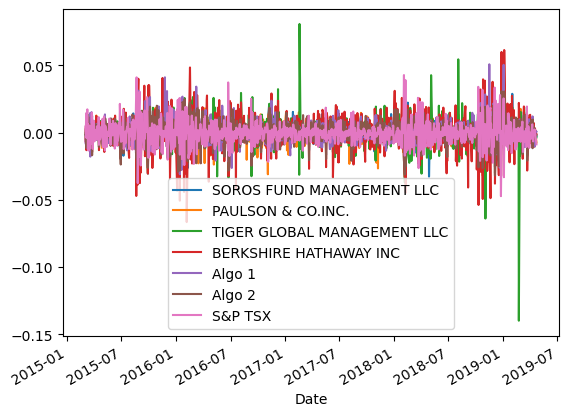

In [287]:
# Plot daily returns of all portfolios
portfolio_returns.plot()

#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504                0.993431  0.998058   
2015-03-04                     0.996972                0.997617  0.989486   
2015-03-05                     0.999319                1.004327  0.988541   
2015-03-06                     0.990844                0.991172  0.983641   
2015-03-09                     0.996633                0.989534  0.978283   

              Algo 2   S&P TSX  

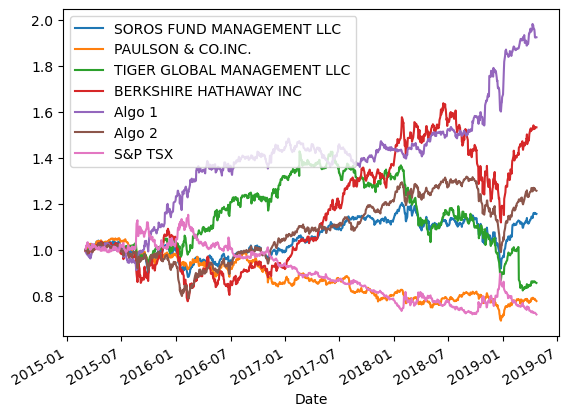

In [288]:
cumulative_returns = (1 + portfolio_returns).cumprod()  #Calculate cumulative returns of all portfolios
cumulative_returns.plot()  #Plot cumulative returns

print(cumulative_returns.head())  #Print cumulative returns sample

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

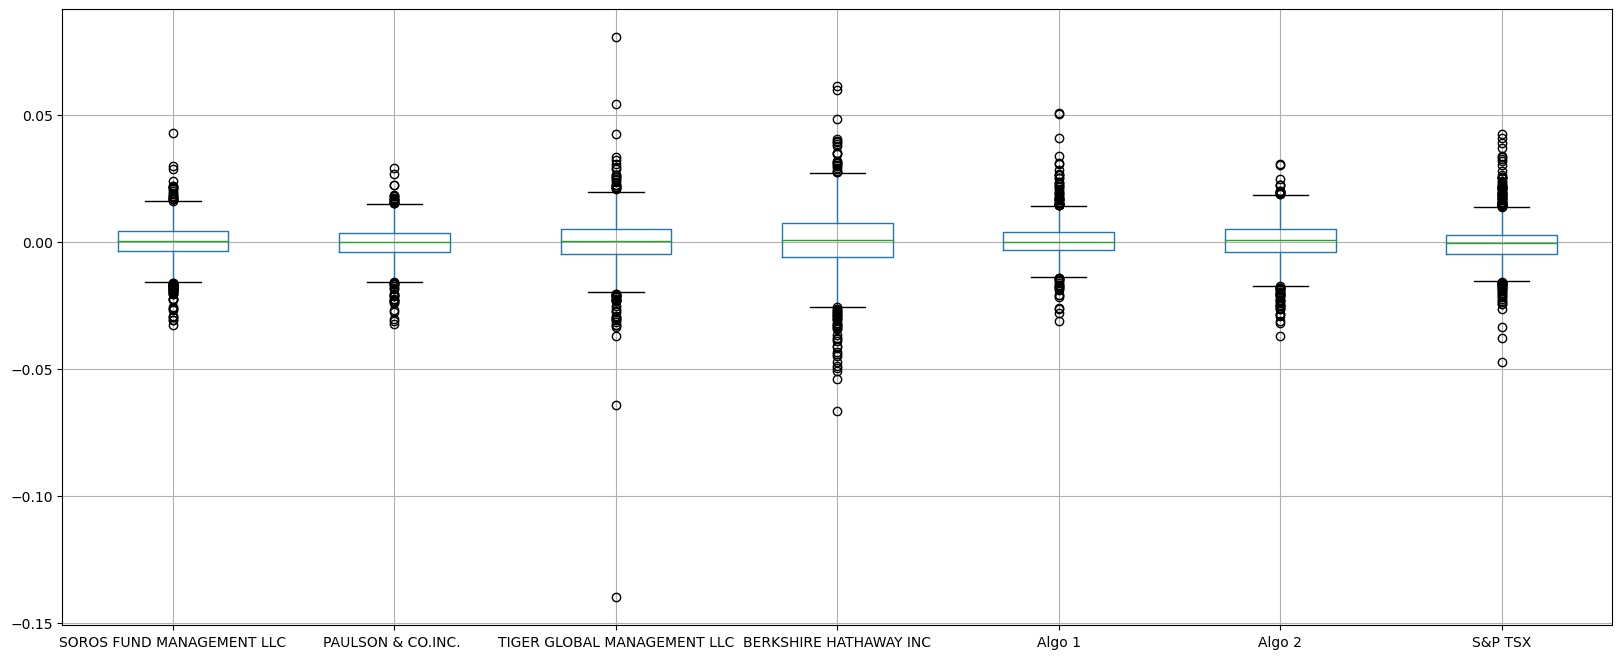

In [308]:
portfolio_returns.boxplot(figsize=(20,8))  #Box plot to visually show risk

### Calculate Standard Deviations

In [290]:
portfolio_returns.std()  #Calculate the daily standard deviations of all portfolios

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P TSX                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [297]:
#Determine which portfolios are riskier than the S&P 500
print(f"Given that the daily standard deviation of the S&P500 is 0.0086, the standard deviations of " + 
      f"Tiger Global Management LLC and Berkshire Hathaway Inc at 0.0109 and 0.0129, respectively, "
      f"makes these portfolios both riskier than the S&P500.")

Given that the daily standard deviation of the S&P500 is 0.0086, the standard deviations of Tiger Global Management LLC and Berkshire Hathaway Inc at 0.0109 and 0.0129, respectively, makes these portfolios both riskier than the S&P500.


### Calculate the Annualized Standard Deviation

In [365]:
annualized_var = (portfolio_returns.var() * 252)  #Calculate the annualized standard deviation (252 trading days)
annualized_std = np.sqrt(annualized_var)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P TSX                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

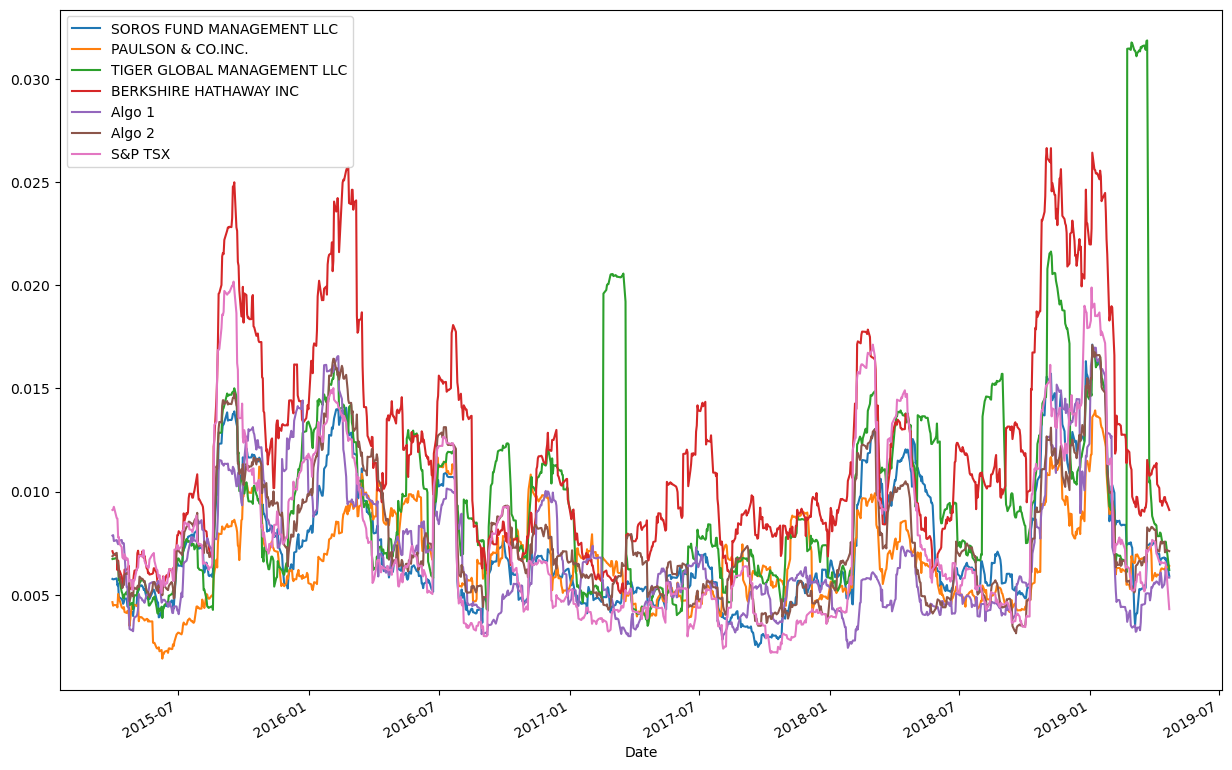

In [310]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

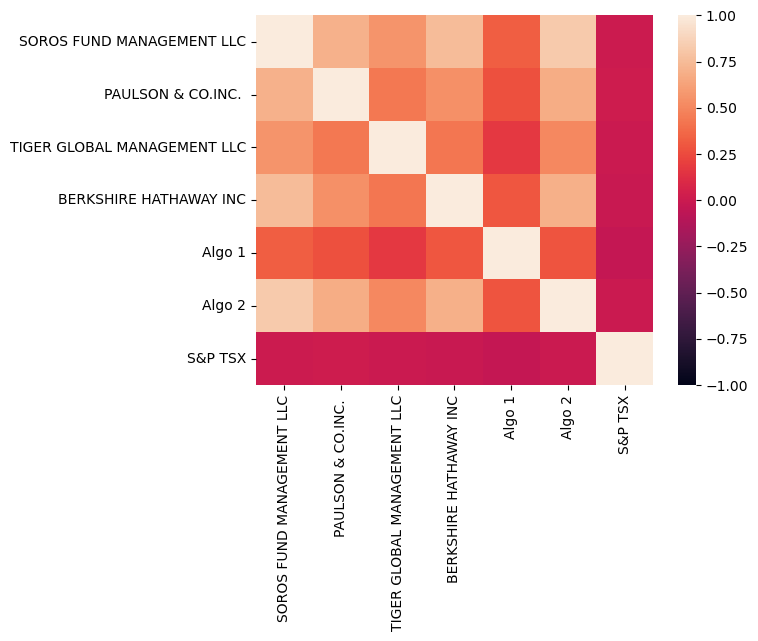

In [317]:
correlation = portfolio_returns.corr()  #Calculate the correlation
correlation  

sns.heatmap(correlation, vmin=-1, vmax=1)  #Display the correlation matrix

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger Global Management LLC'}, xlabel='Date'>

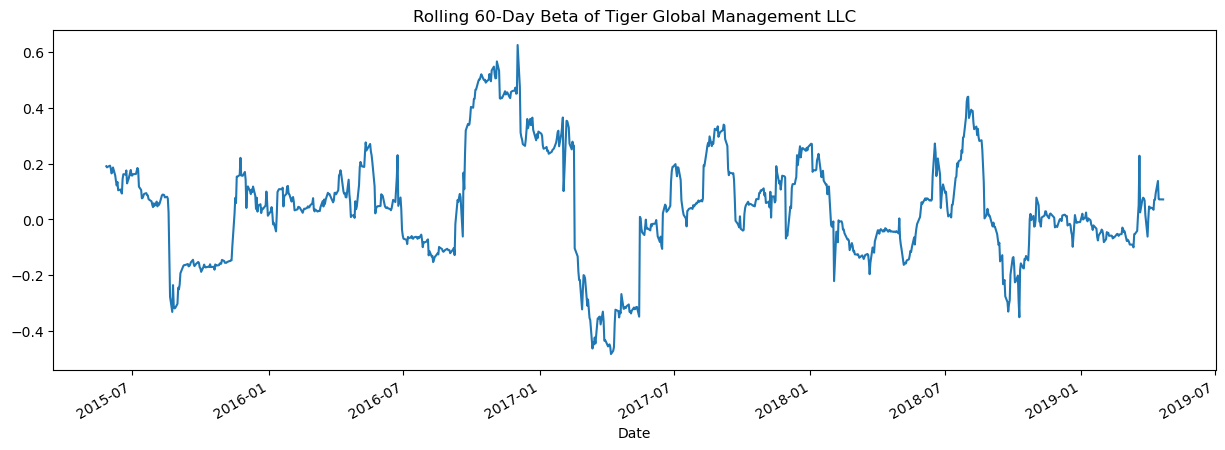

In [326]:
#Calculate covariance of a single portfolio
covariance = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(portfolio_returns['S&P TSX'])

variance = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].var()  #Calculate variance of S&P 500
variance    

tiger_beta = covariance / variance  #Computing beta
tiger_beta

#Computing rolling variance and rolling variance between Tiger Global and S&P 500
rolling_cov = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(portfolio_returns['S&P TSX'])
rolling_var = portfolio_returns['S&P TSX'].rolling(window=60).var() 

rolling_beta = rolling_cov / rolling_var  #Calculate rolling beta
rolling_beta.plot(figsize=(15,5), title='Rolling 60-Day Beta of Tiger Global Management LLC')  #Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

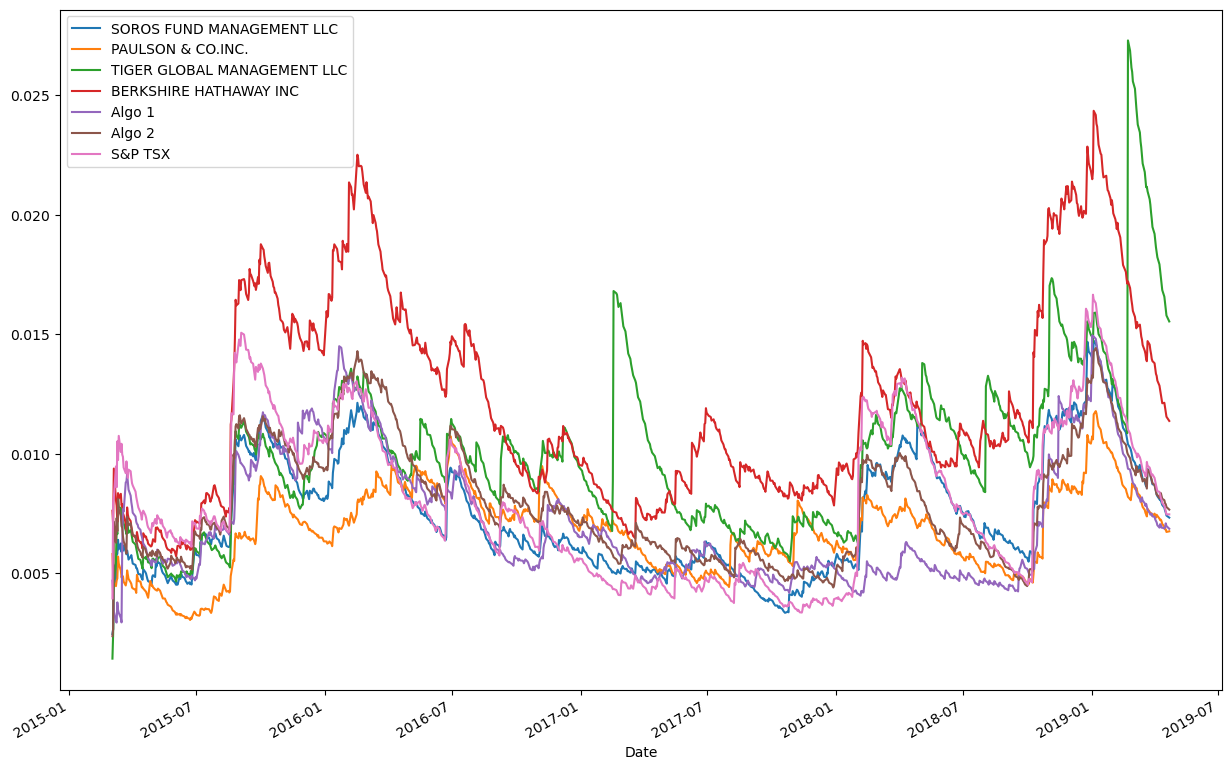

In [330]:
portfolio_returns.ewm(halflife=21).std().plot(figsize=(15,10))  # Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [331]:
# Annualized Sharpe Ratios
sharpe_ratio = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P TSX                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Annualized Portfolio Sharpe Ratios'}>

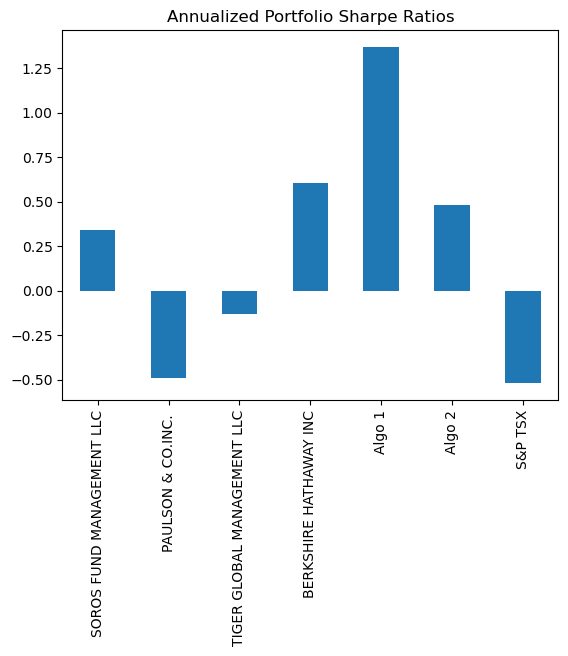

In [332]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Annualized Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Through analysis of the Sharpe Ratios of the whales portfolios against and the algorithmic strategies 1 and 2 plotted against
the S&P 500, it is clear that the algorithmic strategies cumulatively outperform both the whales portfolios and the market. While Berkshire Hathaway does appear to outperform Algorithm 2, the disparity between Berkshire Hathaway and other portfolios
against Algorithm 1 demonstrates a greater performance.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [333]:
aapl_path = Path('./Resources/aapl_historical.csv')  #Reading data from 1st stock (AAPL)
aapl_csv = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_csv.rename(columns={"Symbol": "AAPL1","NOCP": "AAPL"}, inplace=True) #Reorganize portfolio data by having a column per symbol
aapl_csv.drop(columns=['AAPL1'], axis=1, inplace=True)  #Drop AAPL1 column

In [335]:
goog_path = Path('./Resources/goog_historical.csv')  #Reading data from 2nd stock (GOOG)
goog_csv = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_csv.rename(columns={"Symbol": "GOOG1","NOCP": "GOOG"}, inplace=True) #Reorganize portfolio data by having a column per symbol
goog_csv.drop(columns=['GOOG1'], axis=1, inplace=True)  #Drop GOOG1 column

In [337]:
cost_path = Path('./Resources/cost_historical.csv')  #Reading data from 3rd stock (COST)
cost_csv = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_csv.rename(columns={"Symbol": "COST1","NOCP": "COST"}, inplace=True) #Reorganize portfolio data by having a column per symbol
cost_csv.drop(columns=['COST1'], axis=1, inplace=True)  #Drop COST1 column

In [340]:
# Combine all stocks in a single DataFrame
portfolio2 = pd.concat([aapl_csv,goog_csv,cost_csv], axis=1, join='inner')
portfolio2.head()  #Return combined custom portfolio2 dataframe sample

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [341]:
portfolio2.sort_index(inplace=True)   #Reset Date index
portfolio2.head()  #Return updated portfolio2 df sample

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [342]:
portfolio2_clean = portfolio2.dropna() #Drop nulls
portfolio2_clean.isnull().sum()  #Validate nulls are dropped
print(portfolio2_clean.dtypes)  #Check data types

daily_returns_2 = portfolio2_clean.pct_change()  #Calculate daily returns
daily_returns_2.head()  #Display sample data

AAPL    float64
GOOG    float64
COST    float64
dtype: object


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [346]:
weights = [1/3, 1/3, 1/3]  #Set weights

portfolio_returns_2 = daily_returns_2.dot(weights)  #Calculate portfolio return
custom_df = pd.DataFrame(portfolio_returns_2)  #Generate custom dataframe of portfolio 2 weighted returns
custom_df.head()  #Display sample data

,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [348]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns_3 = pd.concat([portfolio_returns_2,portfolio_returns], axis=1, join='inner')
portfolio_returns_3.rename(columns={0: "Custom"}, inplace=True)  #Rename portfolio 2 returns from 0 to 'Custom'
portfolio_returns_3.sort_index()  #Reset date index
portfolio_returns_3.dropna(inplace=True)  #Drop nulls to compare only dates where return data exists for all stocks
portfolio_returns_3.head()  #Display sample data

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [349]:
portfolio_returns_3.std()  #Calculate the annualized `std`
annualized_var_2 = (portfolio_returns_3.var() * 252)  #Calculcate annualized variance
annualized_std_2 = np.sqrt(annualized_var_2)  #Calculate annualized std
annualized_std_2

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P TSX                        0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD within 21-Day Window'}>

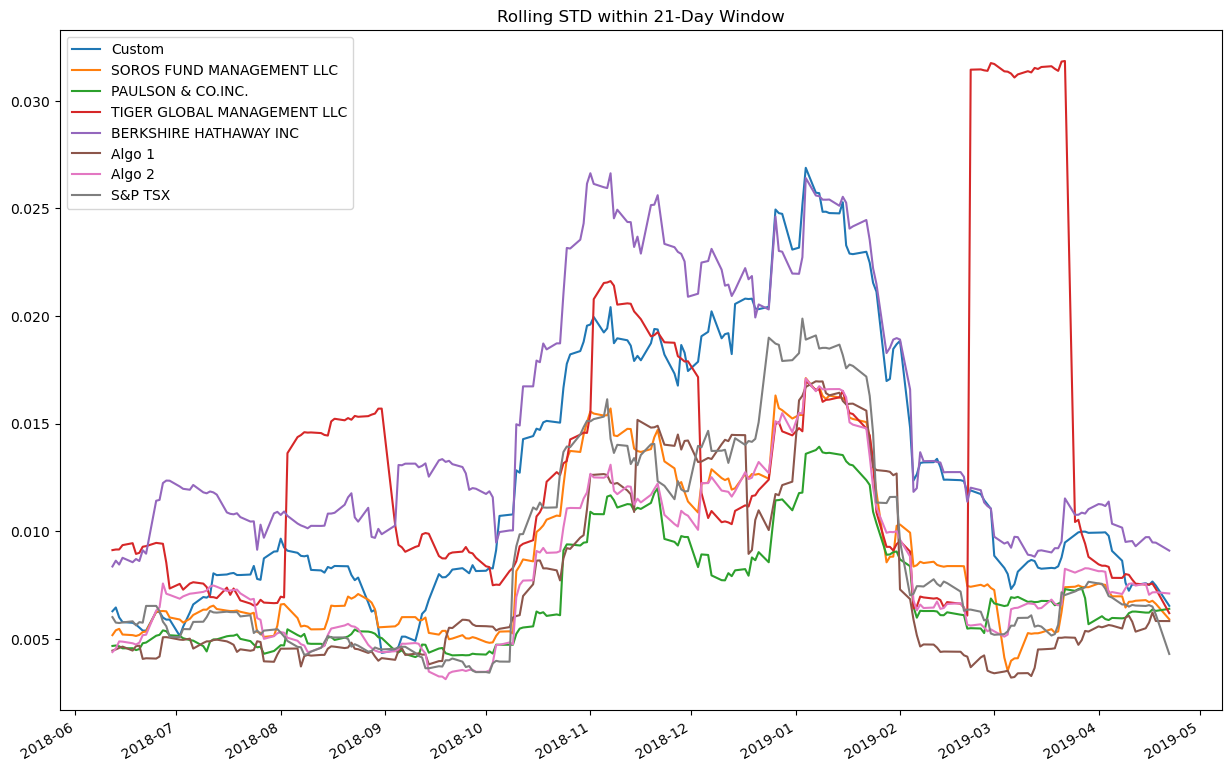

In [351]:
#Calculate rolling standard deviation and plot it
portfolio_returns_3.rolling(window=21).std().plot(figsize=(15,10), title="Rolling STD within 21-Day Window") 

### Calculate and plot the correlation

<AxesSubplot:>

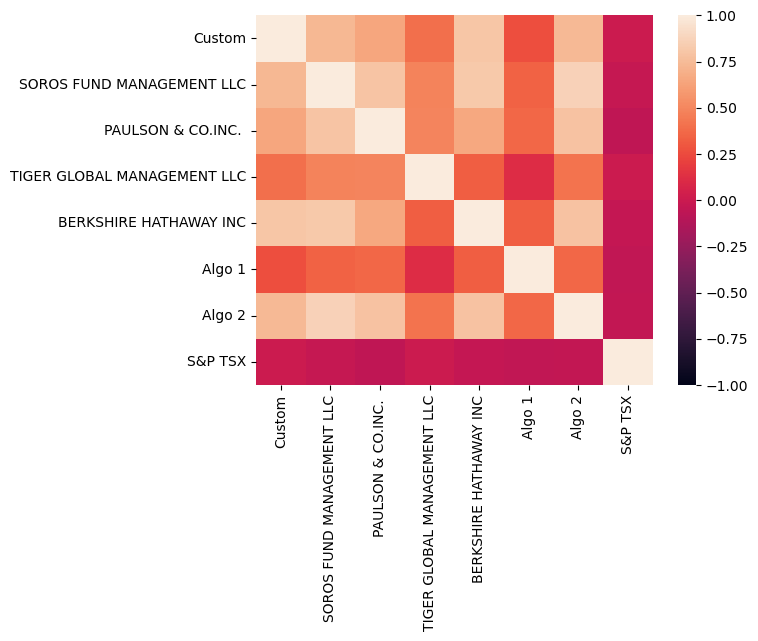

In [352]:
correlation = portfolio_returns_3.corr()  #Calculate and plot the correlation
correlation

sns.heatmap(correlation, vmin=-1, vmax=1)  #Return correlation heatmap

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio vs. S&P 500'}>

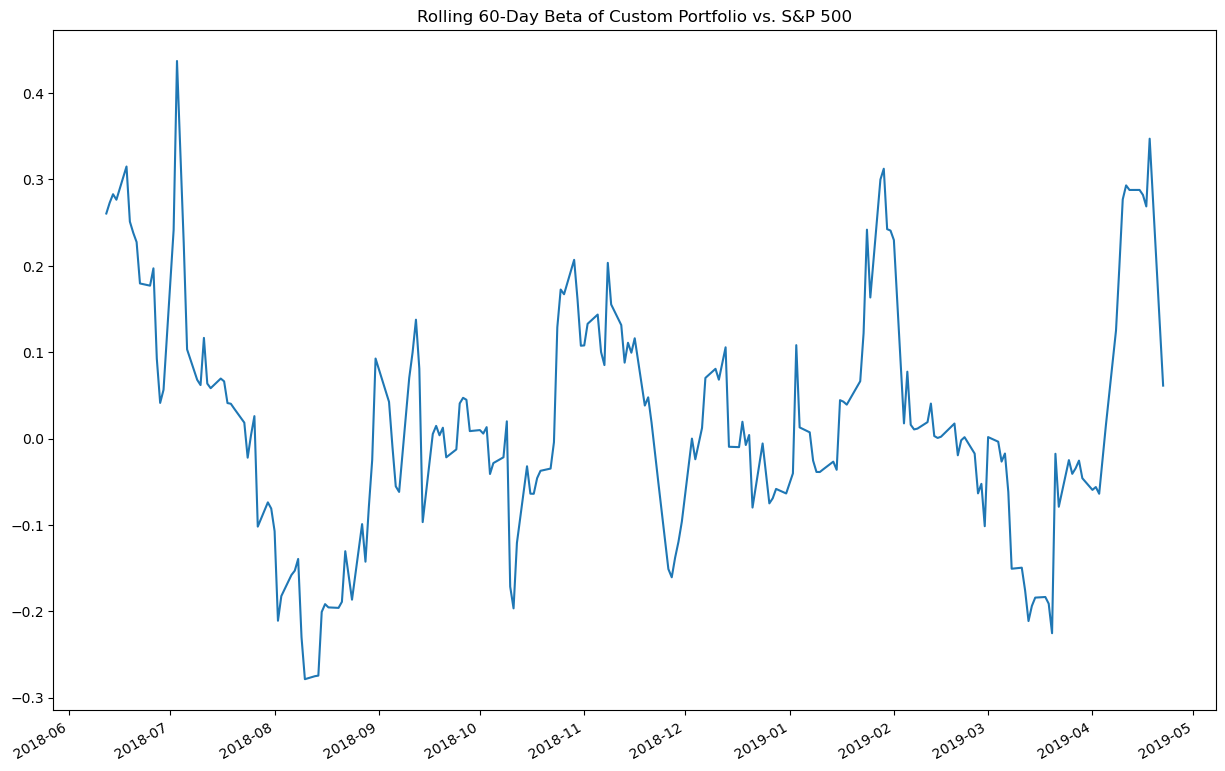

In [359]:
rolling_variance = portfolio_returns_3['Custom'].rolling(window=21).var()  #Calculate variance of my portfolio
rolling_covariance = portfolio_returns_3['Custom'].rolling(window=21).cov(portfolio_returns_3['S&P TSX']) #Calculate covariance
#between my portfolio and the market

rolling_beta = rolling_covariance / rolling_variance  #Calculate rolling beta of custom portfolio
rolling_beta.plot(figsize=(15,10), title='Rolling 60-Day Beta of Custom Portfolio vs. S&P 500')  #Plot rolling 60-day Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [363]:
sharpe_ratio_3 = (portfolio_returns_3.mean() * 252 / ((portfolio_returns_3).std() * np.sqrt(252)))  #Calculate Annualized Sharpe Ratios
sharpe_ratio_3

Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P TSX                       -0.427676
dtype: float64

<AxesSubplot:title={'center':'Portfolio 3 Sharpe Ratios'}>

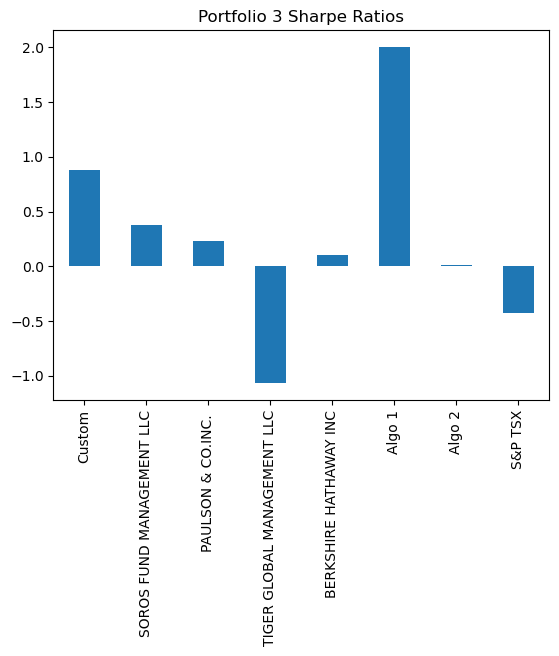

In [364]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_3.plot(kind="bar", title="Portfolio 3 Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [367]:
print(f"From the analysis of the Sharpe Ratios of my custom portfolio against the Soros Fund Management, Paulson & Co., "+
      f"Tiger Global Management, Berkshire Hathaway, the second algorithmic trading portfolio (Algo 2), and the market, "+
      f"it can be inferred that my custom portfolio of GOOG, AAPL, and COST stands to be competitive and outperforms all "+
      f"other portfolios with the exception of Algorithm 1. While it has great return of investment for its risk, Algorithm 1 "+
      f"still demonstrates better returns, suggesting that other portfolios should incorporate algorithms such as this.")

From the analysis of the Sharpe Ratios of my custom portfolio against the Soros Fund Management, Paulson & Co., Tiger Global Management, Berkshire Hathaway, the second algorithmic trading portfolio (Algo 2), and the market, it can be inferred that my custom portfolio of GOOG, AAPL, and COST stands to be competitive and outperforms all other portfolios with the exception of Algorithm 1. While it has great return of investment for its risk, Algorithm 1 still demonstrates better returns, suggesting that other portfolios should incorporate algorithms such as this.
